# Figure 4

In [1]:
# Import packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, Ellipse
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
# Print version numbers.
print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)
# Intialize my pandas preferences.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

matplotlib 3.5.2
numpy 1.22.3
pandas 1.4.2


In [2]:
# Load the datframe for figure 4.
div_df = pd.read_csv('./data/tgp_afr_amr_haplotype_archaic_diplotype_divergence_72kb.csv.gz')

In [3]:
# Intialize convience dictionaries.
arc_labs = {
    'DEN': 'Denisovan', 'ALT': 'Altai Nean.',
    'CHA': 'Chagyrskaya Nean.', 'VIN': 'Vindija Nean.',
}
hap_cols = {
    'hap_1': 'Focal 72kb Region (Seq. Div. Hap. 1)',
    'hap_2': 'Focal 72kb Region (Seq. Div. Hap. 2)',
}
# Intialize the sequence divergence results per archaic.
arc_div = {key: div_df[div_df['Archaic'] == value] for key, value in arc_labs.items()}
# Intialize the sequence divergence results per archaic.
arc_div = {key: div_df[div_df['Archaic'] == value] for key, value in arc_labs.items()}
# Intialize a super population list.
spop_list = ['AFR', 'AMR']
# Intialize the sequence divergence results per superpopulation per archaic.
spop_div = {spop: {arc: arc_div[arc][arc_div[arc]['Super Population'] == spop] for arc in arc_div} for spop in spop_list}
# Intialize a dictionary for plotting.
plot_data = {
    spop: {
        'hist1d': np.concatenate([
            spop_div[spop]['DEN'][hap_cols['hap_1']].values,
            spop_div[spop]['DEN'][hap_cols['hap_2']].values,
        ]),
        'hist2d_x': np.concatenate([
            spop_div[spop]['DEN'][hap_cols['hap_1']].values,
            spop_div[spop]['DEN'][hap_cols['hap_2']].values,
            spop_div[spop]['DEN'][hap_cols['hap_1']].values,
            spop_div[spop]['DEN'][hap_cols['hap_2']].values,
            spop_div[spop]['DEN'][hap_cols['hap_1']].values,
            spop_div[spop]['DEN'][hap_cols['hap_2']].values,
        ]),
        'hist2d_y': np.concatenate([
            spop_div[spop]['ALT'][hap_cols['hap_1']].values,
            spop_div[spop]['ALT'][hap_cols['hap_2']].values,
            spop_div[spop]['CHA'][hap_cols['hap_1']].values,
            spop_div[spop]['CHA'][hap_cols['hap_2']].values,
            spop_div[spop]['VIN'][hap_cols['hap_1']].values,
            spop_div[spop]['VIN'][hap_cols['hap_2']].values,
        ]),
        'colors': np.concatenate([
            ['#56B4E9'] * spop_div[spop]['ALT'].shape[0] * 2,
            ['#F0E442'] * spop_div[spop]['CHA'].shape[0] * 2,
            ['#CC79A7'] * spop_div[spop]['VIN'].shape[0] * 2,
        ]),
    }
    for spop in spop_list
}

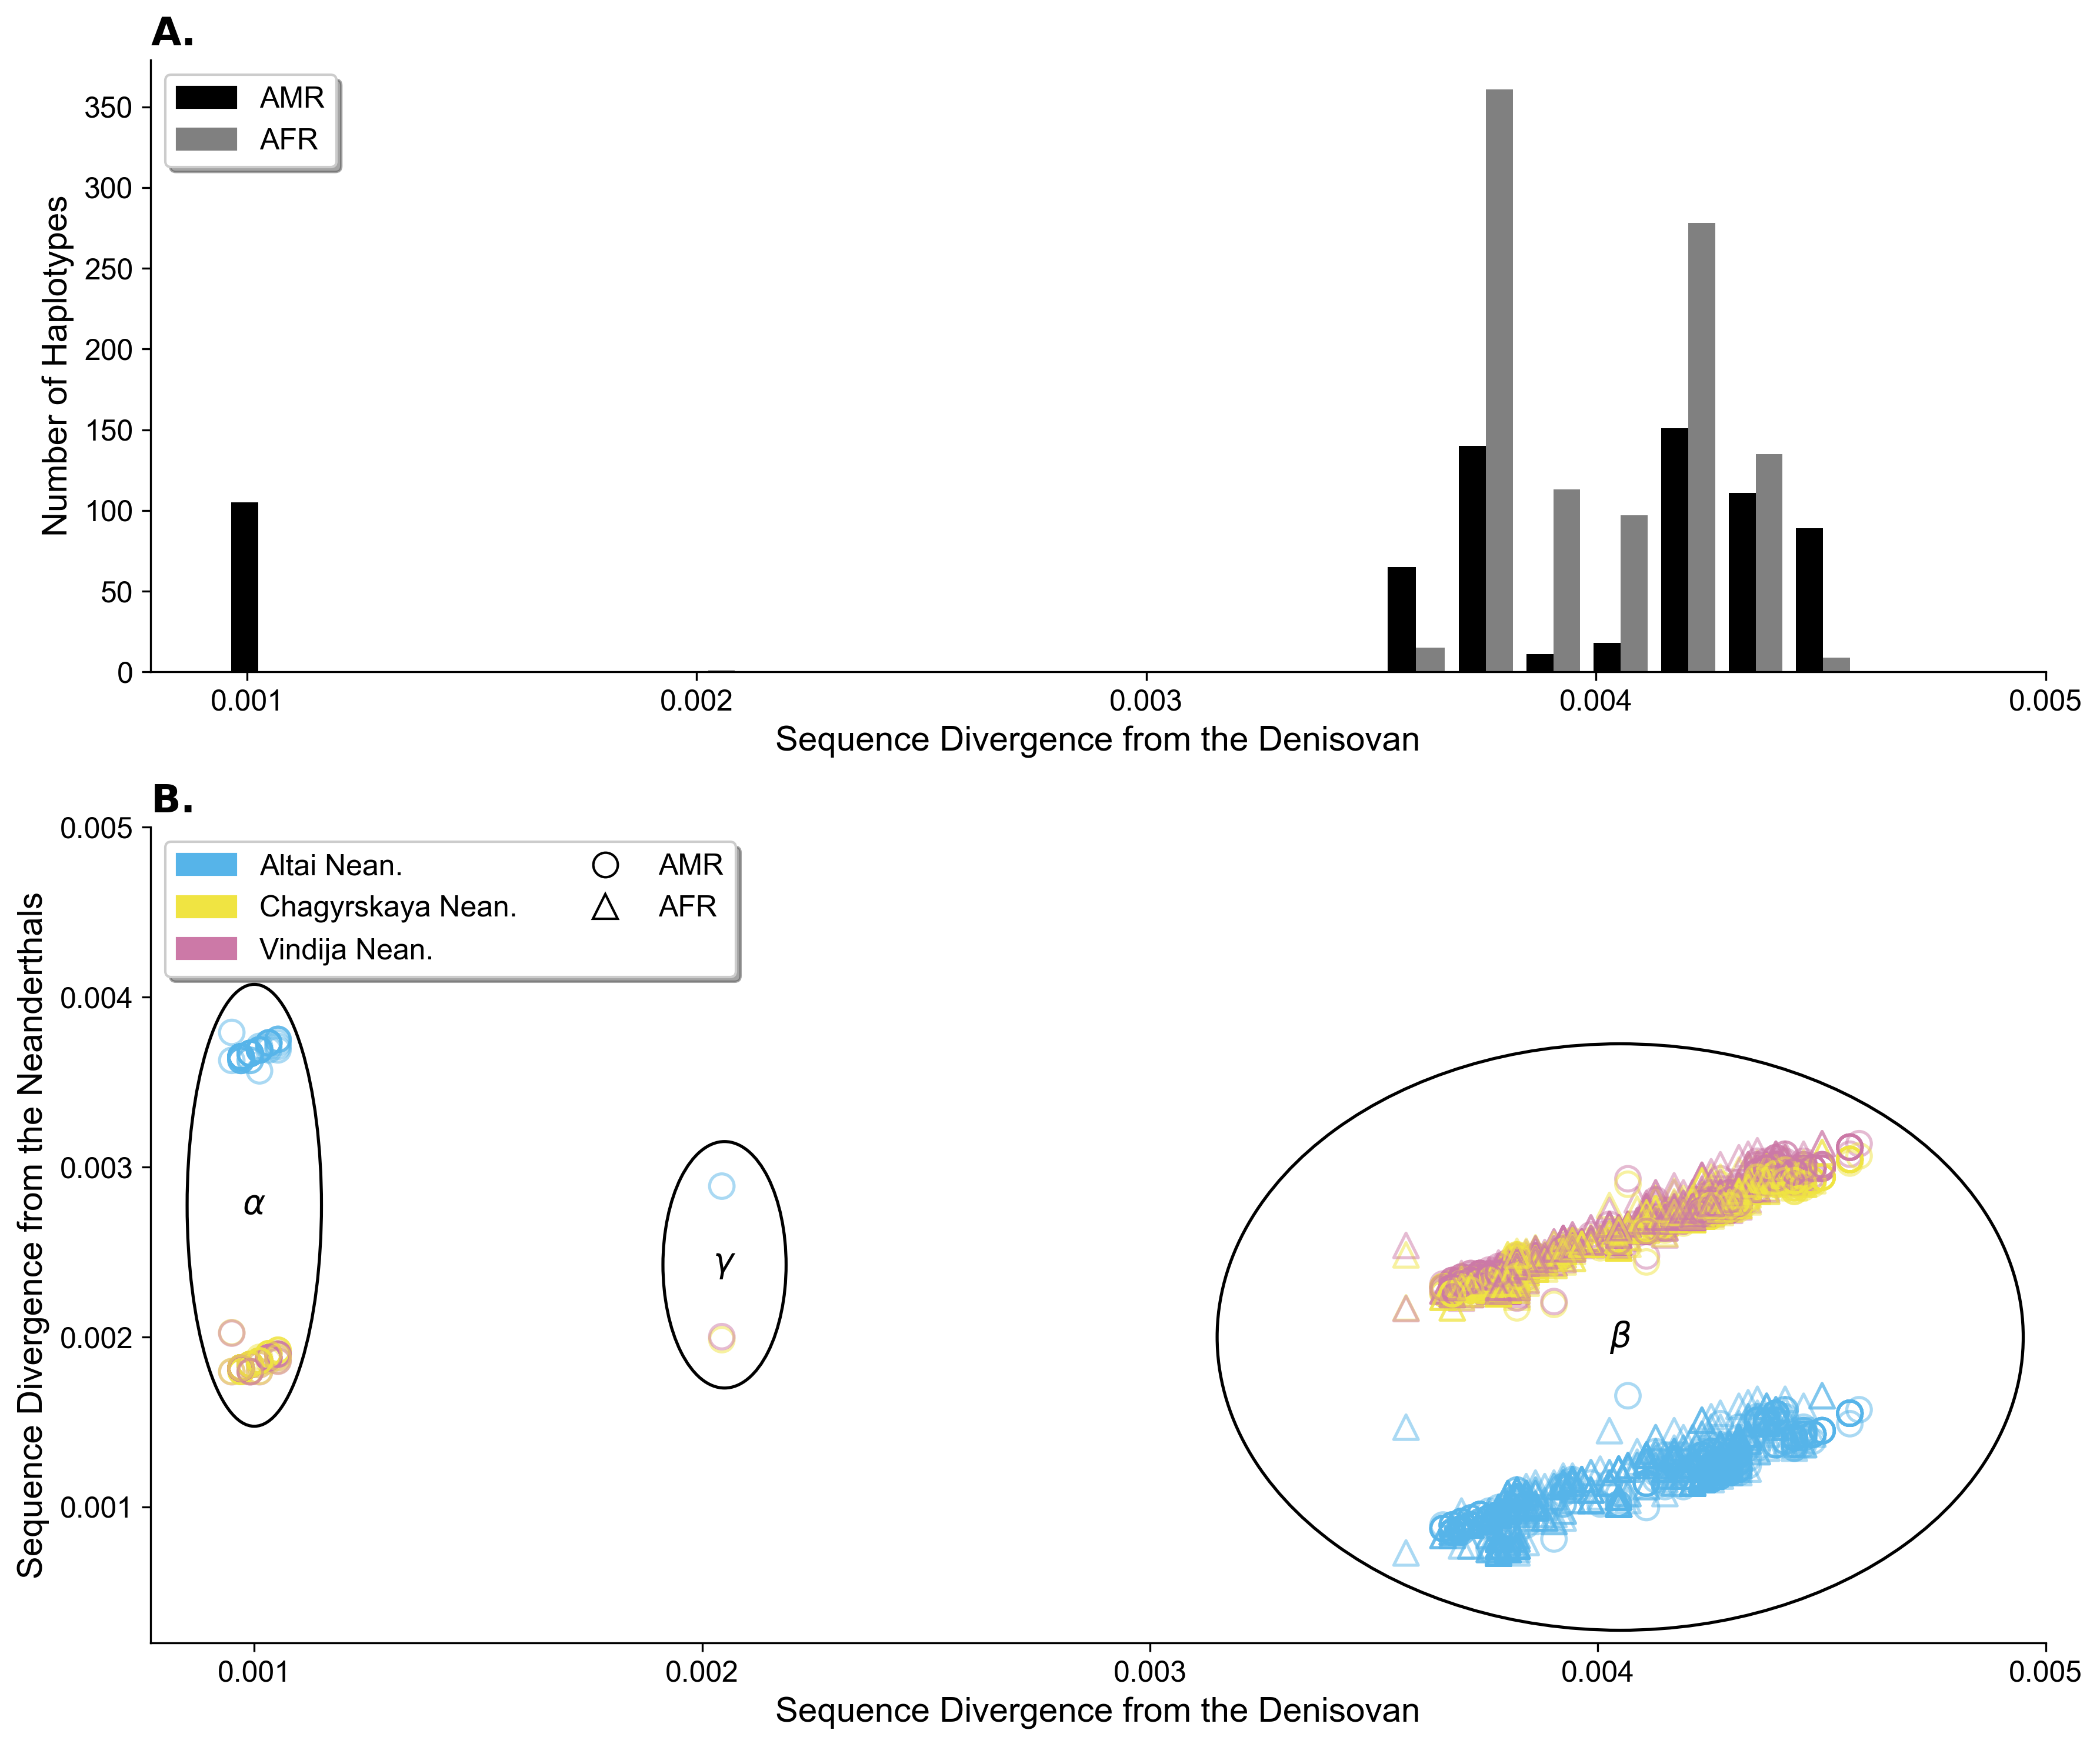

In [4]:
# Intialize the matplolib styling.
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})
# Intialize the figure.
fig = plt.figure(
    figsize=(12, 10), dpi=300,
    facecolor='white',
)
# Intialize the grid.
gs = gridspec.GridSpec(2, 1, height_ratios=[0.75, 1])
# Intialize the axes.
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])



###############
### Panel A ###
###############

# Plot the Denisovan haplotype distribution.
ax1.hist(
    [plot_data['AMR']['hist1d'], plot_data['AFR']['hist1d']],
    bins=np.round(np.linspace(
        min(plot_data['AMR']['hist1d'].min(), plot_data['AFR']['hist1d'].min()),
        max(plot_data['AMR']['hist1d'].max(), plot_data['AFR']['hist1d'].max()), 
        25), 5),
    color=['black', 'gray'], histtype='bar',
)
# Adjust the x-axis ticks.
ax1.set_xticks(
    np.linspace(0.001, 0.005, 5),
)
# Set the axes labels.
ax1.set_xlabel('Sequence Divergence from the Denisovan')
ax1.set_ylabel('Number of Haplotypes')
# Add a legend.
ax1.legend(
    handles=[Patch(color='black', label='AMR'), Patch(color='gray', label='AFR')],
    loc='upper left', bbox_to_anchor=(0, 1), frameon=True, fancybox=True, shadow=True,
)



###############
### Panel B ###
###############

# Concatenate the super population data.
joint_xvals = np.concatenate((plot_data['AMR']['hist2d_x'], plot_data['AFR']['hist2d_x']))
joint_yvals = np.concatenate((plot_data['AMR']['hist2d_y'], plot_data['AFR']['hist2d_y']))
joint_colors = np.concatenate((plot_data['AMR']['colors'], plot_data['AFR']['colors']))
joint_markers = ['o'] * plot_data['AMR']['hist2d_x'].size + ['^'] * plot_data['AFR']['hist2d_x'].size
# Shuffle the indicies.
shuffled_idx = np.random.choice(np.arange(joint_xvals.size), size=joint_xvals.size, replace=False)
# For every haplotype
for i in range(shuffled_idx.size):
    # Plot the joint distribution.
    ax2.scatter(
        joint_xvals[shuffled_idx[i]], joint_yvals[shuffled_idx[i]],
        marker=joint_markers[shuffled_idx[i]], edgecolor=joint_colors[shuffled_idx[i]],
        facecolor='none', linewidth=1.25, s=100, alpha=0.5,
    )
# Adjust the x- and y-axis ticks
ax2.set_xticks(np.linspace(0.001, 0.005, 5))
ax2.set_yticks(np.linspace(0.001, 0.005, 5))
# Set the y-axis limits.
ax2.set_ylim(0.0002, 0.005)
# Set the axes labels.
ax2.set_xlabel('Sequence Divergence from the Denisovan')
ax2.set_ylabel('Sequence Divergence from the Neanderthals')
# Add a legend.
ax2.legend(
    handles=[
        Patch(color='#56B4E9', label='Altai Nean.'),
        Patch(color='#F0E442', label='Chagyrskaya Nean.'),
        Patch(color='#CC79A7', label='Vindija Nean.'),
        Line2D([0], [0], linestyle='none', marker='o', markersize=10, markerfacecolor='none', markeredgecolor='black', label='AMR'),
        Line2D([0], [0], linestyle='none', marker='^', markersize=10, markerfacecolor='none', markeredgecolor='black', label='AFR'),
    ],
    loc='upper left', bbox_to_anchor=(0, 1), ncol=2, frameon=True, fancybox=True, shadow=True,
)
# Intialize the three clusters.
ellipses = [
    ((0.001, 0.002775), 0.0003, 0.0026, r'$\alpha$'),
    ((0.00405, 0.002), 0.0018, 0.00345, r'$\beta$'),
    ((0.00205, 0.002425), 0.000275, 0.00145, r'$\gamma$'),
]
# For every cluster.
for center, width, height, numeral in ellipses:
    # Outliner the cluster.
    ax2.add_patch(Ellipse(
        center, width=width, height=height,
        edgecolor='black', facecolor='none', linewidth=1.25,
    ))
    # Annotate the cluster.
    ax2.annotate(numeral, center, color='black', fontsize=14, ha='center', va='center')


#################
### Exporting ###
#################

# Intilaize a title list.
title_list = [
    r'$\bf{A.}$',
    r'$\bf{B.}$',
]
# For each subplot.
for ax, title in zip([ax1, ax2], title_list):
    # Plot the title.
    ax.set_title(title, loc='left')
# Export the plot.
plt.savefig(
    './main_figures/png/figure_4.png', format='png',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/svg/figure_4.svg', format='svg',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/pdf/figure_4.pdf', format='pdf',
    facecolor='white', bbox_inches='tight', dpi=500,
)
# Enforce a tight layout.
plt.tight_layout()
# Show the plot.
plt.show()